In [1]:
import numpy as np
import matplotlib.pyplot as plt

def createTrainDatasWithNoise(W, start, end, size = 10, noise = 0.05):
    """
    创建带噪声的训练数据集
    args:
        W - 目标权重系数
        start - 最小值
        end - 最大值
        size - 训练数据集大小
        noise - 噪音大小
    return:
        X - 训练集特征值
        y - 训练集目标值
    """
    np.random.seed(42)
    X = np.random.uniform(start, end, (size, W.shape[0]))
    y = []
    for index in range(len(X)):
        if np.random.random() > noise:
            y.append(np.sign(X[index].dot(W)))
        else:
            y.append(-np.sign(X[index].dot(W)))
    return X, np.array(y)

def buildLine(W, start, end):
    """
    构建一条指定的二维直线
    args:
        W - 权重系数
        start - 最小值
        end - 最大值
        size - 组成线的点的数量
    return:
        x0 - x0集合
        x1 - x1集合
    """
    x0 = np.linspace(start, end, size)
    if W[1] == 0:
        x1 = np.zeros(100)
    else:
        x1 = -W[0] * x0 / W[1]
    return x0, x1

创建带噪声的数据集：

In [2]:
# 坐标轴起始点
start = -10
# 坐标轴结束点
end = 10
# 目标权重系数
W = np.array([2, 5])
# 创建线性可分的训练数据集
X, y = createTrainDatasWithNoise(W, start, end)

可视化：

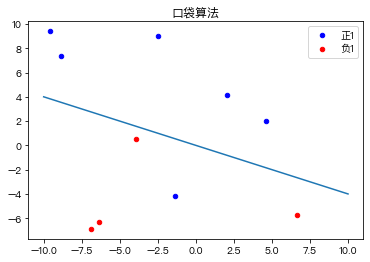

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams['font.sans-serif'] = ['PingFang HK']  # 选择一个本地的支持中文的字体

# %matplotlib inline

x1 = X[y>0][:, 0]
y1 = X[y>0][:, 1]
x2 = X[y<0][:, 0]
y2 = X[y<0][:, 1]
plt.title('口袋算法')
p1 = plt.scatter(x1, y1, c='b', marker='o', s=20)
p2 = plt.scatter(x2, y2, c='r', marker='o', s=20)
x3, y3 = buildLine(W, start, end)
plt.plot(x3, y3)
plt.legend([p1, p2], ["正1", "负1"], loc="upper right")
plt.show()

使用 Python 实现口袋算法：

In [4]:
import numpy as np

def errorIndexes(W, X, y):
    """
    获取错误点的下标集合
    args:
        W - 权重系数
        X - 训练数据集
        y - 目标标签值
    return:
        errorIndexes - 错误点的下标集合
    """
    errorIndexes = []
    # 遍历训练数据集
    for index in range(len(X)):
        x = X[index]
        # 判定是否与目标值不符
        if x.dot(W) * y[index] <= 0:
            errorIndexes.append(index)
    return errorIndexes

def pocket(X, y, iteration, maxIterNoChange = 10):
    """
    口袋算法实现
    args:
        X - 训练数据集
        y - 目标标签值
        iteration - 最大迭代次数
    return:
        W - 权重系数
    """
    np.random.seed(42)
    # 初始化权重系数
    W = np.zeros(X.shape[1])
    # 获取错误点的下标集合
    errors = errorIndexes(W, X, y)
    iterNoChange = 0
    # 循环
    for i in range(iteration):
        iterNoChange = iterNoChange + 1
        # 随机获取错误点下标
        errorIndex = np.random.randint(0, len(errors))
        # 计算临时权重系数
        tmpW = W + y[errors[errorIndex]] * X[errorIndex]
        # 获取临时权重系数下错误点的下标集合
        tmpErrors = errorIndexes(tmpW, X, y)
        # 如果错误点数量更少，就更新权重系数
        if len(errors) >= len(tmpErrors):
            iterNoChange = 0
            # 修正权重系数
            W = tmpW
            errors = tmpErrors
        if iterNoChange >= maxIterNoChange:
            break
    return W

计算权重系数：

In [5]:
W = pocket(X, y, 50, 20)
W

array([ 4.65320509, 13.86100871])

可视化：

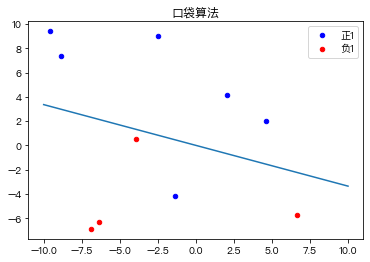

In [6]:
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['PingFang HK']  # 选择一个本地的支持中文的字体

# %matplotlib inline

x1 = X[y>0][:, 0]
y1 = X[y>0][:, 1]
x2 = X[y<0][:, 0]
y2 = X[y<0][:, 1]
plt.title('口袋算法')
plt.scatter(x1, y1, c='b', marker='o', s=20)
plt.scatter(x2, y2, c='r', marker='o', s=20)
x3, y3 = buildLine(W, start, end)
plt.plot(x3, y3)
plt.legend([p1, p2], ["正1", "负1"], loc="upper right")
plt.show()

使用 scikit-learn 拟合：

In [7]:
from sklearn.linear_model import Perceptron

# 初始化感知器
clf = Perceptron()
# 用随机梯度下降拟合线性模型
clf.fit(X, y)
# 权重系数
W = clf.coef_[0]
W

array([2.71448776, 3.84548235])

可视化：

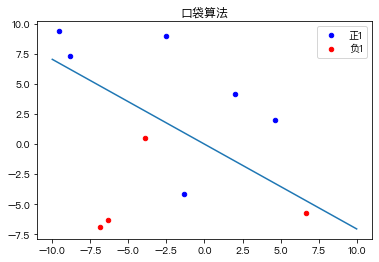

In [8]:
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['PingFang HK']  # 选择一个本地的支持中文的字体

# %matplotlib inline

x1 = X[y>0][:, 0]
y1 = X[y>0][:, 1]
x2 = X[y<0][:, 0]
y2 = X[y<0][:, 1]
plt.title('口袋算法')
plt.scatter(x1, y1, c='b', marker='o', s=20)
plt.scatter(x2, y2, c='r', marker='o', s=20)
x3, y3 = buildLine(W, start, end)
plt.plot(x3, y3)
plt.legend([p1, p2], ["正1", "负1"], loc="upper right")
plt.show()

In [9]:
import numpy as np

def pocketReturn(X, y, iteration, maxIterNoChange = 5):
    """
    口袋算法实现
    args:
        X - 训练数据集
        y - 目标标签值
        iteration - 最大迭代次数
    return:
        Ws - 权重系数数组
        tmpWs - 临时权重系数数组
        errorCounts - 权重系数错误数数组
        tmpErrorCounts - 临时权重系数错误数数组
    """
    np.random.seed(42)
    # 初始化权重系数
    W = np.zeros(X.shape[1])
    Ws = np.array([W])
    tmpWs = np.array([W])
    # 获取错误点的下标集合
    errors = errorIndexes(W, X, y)
    errorCounts = np.array([len(errors)])
    tmpErrorCounts = np.array([len(errors)])
    iterNoChange = 0
    # 循环
    for i in range(iteration):
        iterNoChange = iterNoChange + 1
        # 随机获取错误点下标
        errorIndex = np.random.randint(0, len(errors))
        # 计算临时权重系数
        tmpW = W + y[errors[errorIndex]] * X[errorIndex]
        # 获取临时权重系数下错误点的下标集合
        tmpErrors = errorIndexes(tmpW, X, y)
        # 如果错误点数量更少，就更新权重系数
        if len(errors) >= len(tmpErrors):
            iterNoChange = 0
            # 修正权重系数
            W = tmpW
            errors = tmpErrors
        Ws = np.insert(Ws, len(Ws), values=W, axis=0)
        tmpWs = np.insert(tmpWs, len(tmpWs), values=tmpW, axis=0)
        errorCounts = np.insert(errorCounts, len(errorCounts), values=len(errors), axis=0)
        tmpErrorCounts = np.insert(tmpErrorCounts, len(tmpErrorCounts), values=len(tmpErrors), axis=0)
        if iterNoChange >= maxIterNoChange:
            break
    return Ws, tmpWs, errorCounts, tmpErrorCounts

初始化复杂带噪声的数据集：

In [10]:
# 坐标轴起始点
start = -10
# 坐标轴结束点
end = 10
# 目标权重系数
W = np.array([2, 5])
# 创建线性可分的训练数据集
X, y = createTrainDatasWithNoise(W, start, end, 1000)

计算权重系数：

In [11]:
W = pocket(X, y, 50, 20)
W

array([ 5.92091626, 15.47423216])

可视化：

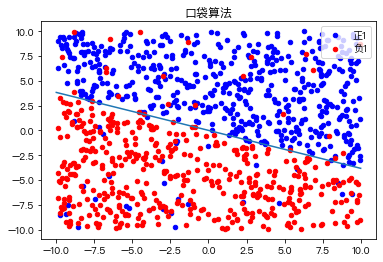

In [12]:
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['PingFang HK']  # 选择一个本地的支持中文的字体

# %matplotlib inline

x1 = X[y>0][:, 0]
y1 = X[y>0][:, 1]
x2 = X[y<0][:, 0]
y2 = X[y<0][:, 1]
plt.title('口袋算法')
p1 = plt.scatter(x1, y1, c='b', marker='o', s=20)
p2 = plt.scatter(x2, y2, c='r', marker='o', s=20)
x3, y3 = buildLine(W, start, end)
plt.plot(x3, y3)
plt.legend([p1, p2], ["正1", "负1"], loc="upper right")
plt.show()

使用 scikit-learn 拟合：

In [13]:
from sklearn.linear_model import Perceptron

# 初始化感知器
clf = Perceptron(max_iter = 50, n_iter_no_change = 10)
# 用随机梯度下降拟合线性模型
clf.fit(X, y)
# 权重系数
W = clf.coef_[0]
W

array([ 6.43384469, 14.98483091])

可视化：

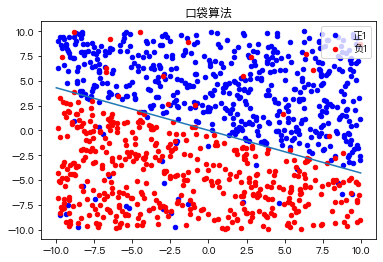

In [14]:
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['PingFang HK']  # 选择一个本地的支持中文的字体

# %matplotlib inline

x1 = X[y>0][:, 0]
y1 = X[y>0][:, 1]
x2 = X[y<0][:, 0]
y2 = X[y<0][:, 1]
plt.title('口袋算法')
p1 = plt.scatter(x1, y1, c='b', marker='o', s=20)
p2 = plt.scatter(x2, y2, c='r', marker='o', s=20)
x3, y3 = buildLine(W, start, end)
plt.plot(x3, y3)
plt.legend([p1, p2], ["正1", "负1"], loc="upper right")
plt.show()

动画演示：

<IPython.core.display.Javascript object>


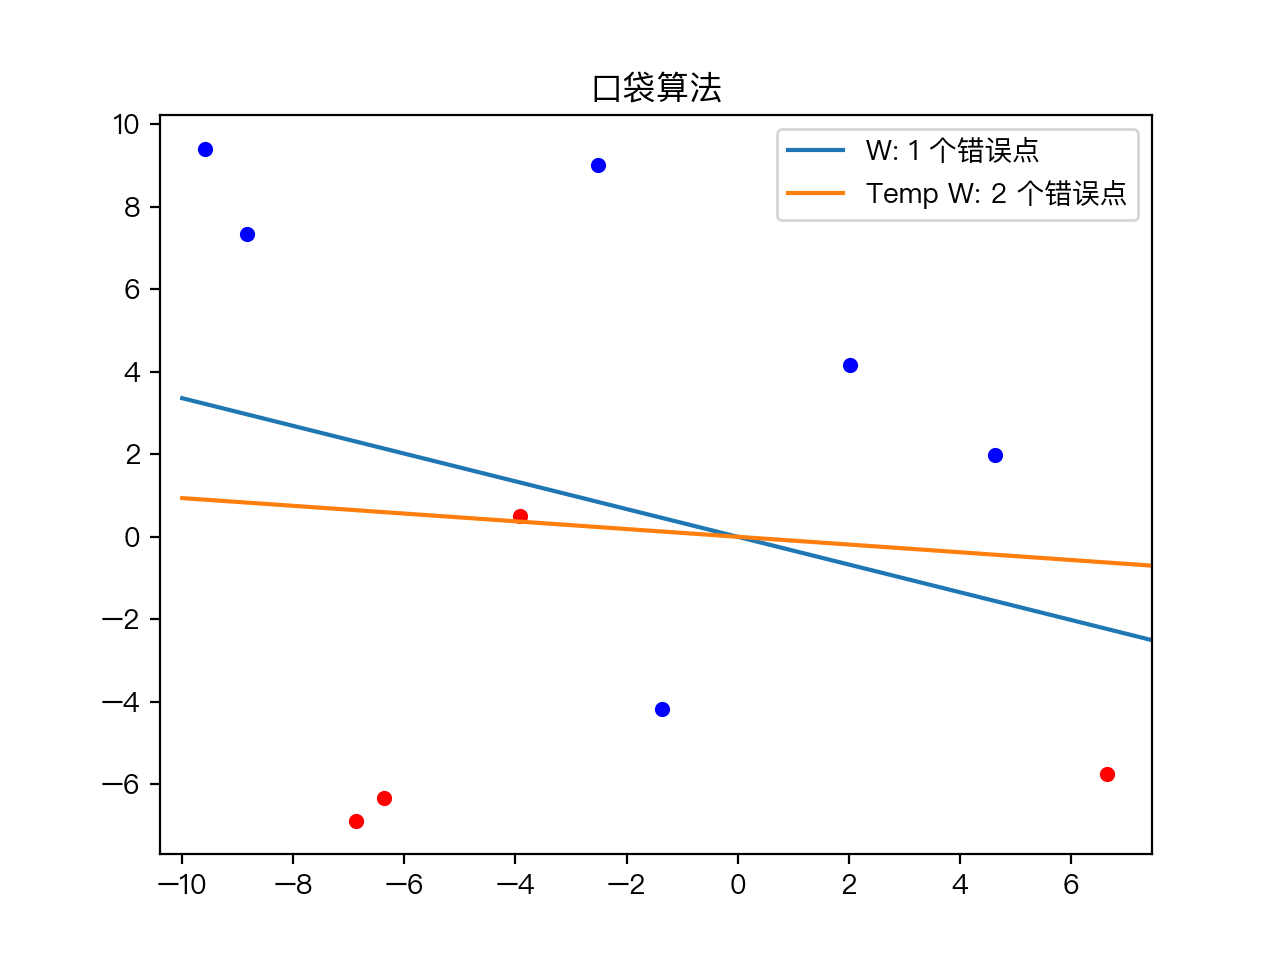

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

plt.rcParams['font.sans-serif'] = ['PingFang HK']  # 选择一个本地的支持中文的字体

%matplotlib notebook

start = -10
end = 10
W = np.array([2, 5])
X, y = createTrainDatasWithNoise(W, start, end)
x1 = X[y>0][:, 0]
y1 = X[y>0][:, 1]
x2 = X[y<0][:, 0]
y2 = X[y<0][:, 1]

Ws, tmpWs, errorCounts, tmpErrorCounts = pocketReturn(X, y, 50)
fig = plt.figure()
plt.title('口袋算法')
plt.scatter(x1, y1, c='b', marker='o', s=20)
plt.scatter(x2, y2, c='r', marker='o', s=20)
line, = plt.plot(0, 0, markersize=0, label='W')
tmpLine, = plt.plot(0, 0, markersize=0, label='Temp W')

def update(i):
    x3, y3 = buildLine(Ws[i], start, end)
    x4, y4 = buildLine(tmpWs[i], start, end)
    line.set_data(x3, y3)
    line.set_label("W: %d 个错误点"%(errorCounts[i]))
    tmpLine.set_data(x4, y4)
    tmpLine.set_label("Temp W: %d 个错误点"%(tmpErrorCounts[i]))
    plt.legend(loc="upper right")
    return line, tmpLine,

ani = animation.FuncAnimation(fig, update, range(0, len(Ws)), interval=1000, blit=True, repeat=False)
ani.save('pocket_simple.gif')
plt.legend(loc="upper right")
plt.show()

动画演示：

<IPython.core.display.Javascript object>


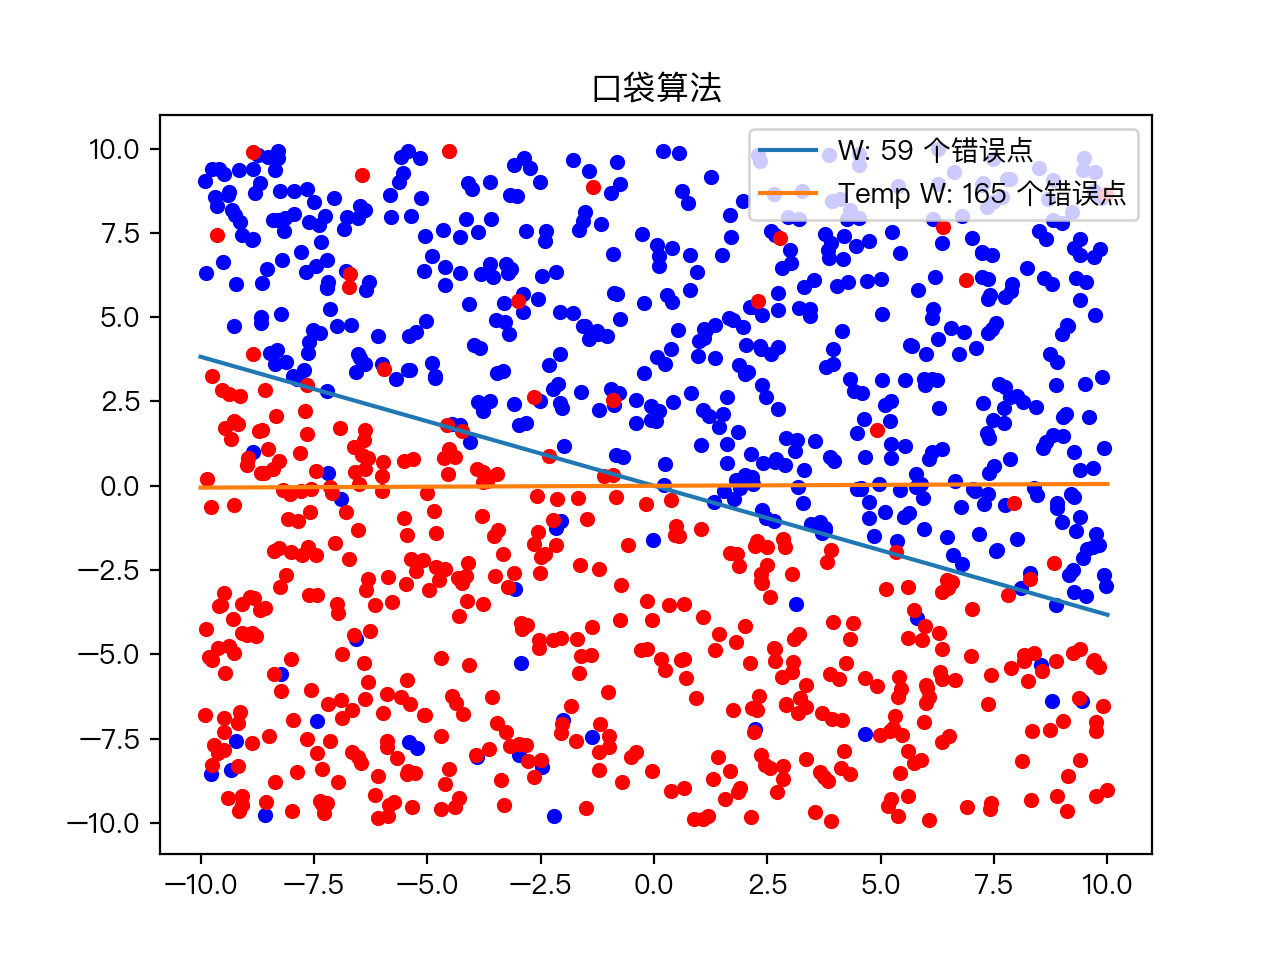

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

plt.rcParams['font.sans-serif'] = ['PingFang HK']  # 选择一个本地的支持中文的字体

%matplotlib notebook

start = -10
end = 10
W = np.array([2, 5])
X, y = createTrainDatasWithNoise(W, start, end, 1000)
x1 = X[y>0][:, 0]
y1 = X[y>0][:, 1]
x2 = X[y<0][:, 0]
y2 = X[y<0][:, 1]

Ws, tmpWs, errorCounts, tmpErrorCounts = pocketReturn(X, y, 50, 20)
fig = plt.figure()
plt.title('口袋算法')
plt.scatter(x1, y1, c='b', marker='o', s=20)
plt.scatter(x2, y2, c='r', marker='o', s=20)
line, = plt.plot(0, 0, markersize=0, label='W')
tmpLine, = plt.plot(0, 0, markersize=0, label='Temp W')

def update(i):
    x3, y3 = buildLine(Ws[i], start, end)
    x4, y4 = buildLine(tmpWs[i], start, end)
    line.set_data(x3, y3)
    line.set_label("W: %d 个错误点"%(errorCounts[i]))
    tmpLine.set_data(x4, y4)
    tmpLine.set_label("Temp W: %d 个错误点"%(tmpErrorCounts[i]))
    plt.legend(loc="upper right")
    return line, tmpLine,

ani = animation.FuncAnimation(fig, update, range(0, len(Ws)), interval=1000, blit=True, repeat=False)
ani.save('pocket.gif')
plt.legend(loc="upper right")
plt.show()